In [1]:
!pip install diffusers transformers accelerate

In [2]:
from diffusers import StableDiffusionPipeline, DDPMScheduler
import torch
# outputnya floating point tensor
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                               variant="fp16", torch_dtype=torch.float16)
pipe.to("cuda")
prompt = "A cat took a fish and running in a market"
scheduler = DDPMScheduler(beta_start=0.00085, beta_end=0.012,
                          beta_schedule="scaled_linear")
# model akan run 30 step dg scheduler DDPM
image = pipe(
    prompt,
    scheduler=scheduler,
    num_inference_steps=30,
    guidance_scale=7.5,
).images[0]
image.save("cat.png")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

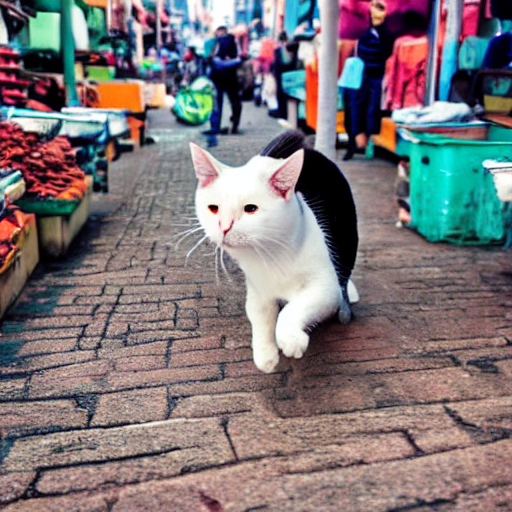

In [5]:
image

lebih lanjut tentang [stable diffusion dari hugging face](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/overview)

# fine tuning dg LoRA

In [6]:
!pip install git+https://github.com/huggingface/diffusers
!pip install accelerate wand
!pip install -r https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/requirements.txt

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-jodvn1np
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-jodvn1np
  Resolved https://github.com/huggingface/diffusers to commit 825979ddc3d03462287f1f5439e89ccac8cc71e9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.33.0.dev0-py3-none-any.whl size=3224289 sha256=1ebae802cf912997250ff4510b1f0d5d5ad3a324ebb8798a5b4e6be9f1419e5a
  Stored in directory: /tmp/pip-ephem-wheel-cache-87z3ypkk/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.31.0
    Uninstalling diffusers-0.31.0:
      Successfully uninstalled diffusers-0.31.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: peft
    Found existing installation: peft 0.14.0
    Uninstalling peft-0.14.0:
      Successfully uninstalled peft-0.14.0
ERROR: pip's dependency resolver does not curr

In [7]:
!accelerate config default
# accelerate configuration saved at $HOME/.cache/huggingface/accelerate/default_config.yaml

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [1]:
import wandb
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler, AutoPipelineForText2Image
from huggingface_hub import model_info

In [2]:
!wget -q https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/train_text_to_image_lora.py

In [3]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from huggingface_hub import model_info
import torch

# LoRA weights ~3 MB
model_path = "pcuenq/pokemon-lora"

info = model_info(model_path)
model_base = info.cardData["base_model"]
pipe = StableDiffusionPipeline.from_pretrained(model_base, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe.unet.load_attn_procs(model_path)
pipe.to("cuda")

image = pipe("Green pokemon with menacing face", num_inference_steps=25).images[0]
image.save("green_pokemon.png")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

pytorch_lora_weights.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/loaders/unet.py:215: FutureWarning: `load_attn_procs` is deprecated and will be removed in version 0.40.0. Using the `load_attn_procs()` method has been deprecated and will be removed in a future version. Please use `load_lora_adapter()`.
  deprecate("load_attn_procs", "0.40.0", deprecation_message)


TypeError: LoraConfig.__init__() got an unexpected keyword argument 'lora_bias'

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5",
                                                     torch_dtype=torch.float16
                                                    ).to("cuda")
pipeline.load_lora_weights("finetune_lora/pokemon",
                           weight_name="pytorch_lora_weights.safetensors")
image = pipeline("A pokemon with blue eyes").images[0]

# inpainting & outpainting

`StableDiffusionInpaintPipeline` digunakan untuk inpainting stable diffusion

 SAM (Segment Anything Model) adlh model image segmentation. [1](https://github.com/facebookresearch/segment-anything)

In [5]:
import numpy as np
import torch
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

!pip install 'git+https://github.com/facebookresearch/segment-anything.git'
from segment_anything import sam_model_registry, SamPredictor

!pip install diffusers accelerate
from diffusers import StableDiffusionInpaintPipeline

!wget -q -nc https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
CHECKPOINT_PATH='/content/sam_vit_b_01ec64.pth'

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_b"

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-_ku8q4e2
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-_ku8q4e2
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=c56733e6c0a1a2ea62372911dffd5f3e2efb1d2818e1a7568ea7802a86203df8
  Stored in directory: /tmp/pip-ephem-wheel-cache-mealrcz5/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


In [6]:
!wget https://machinelearningmastery.com/wp-content/uploads/2024/04/inpaint-example.png

--2024-12-25 06:05:04--  https://machinelearningmastery.com/wp-content/uploads/2024/04/inpaint-example.png
Resolving machinelearningmastery.com (machinelearningmastery.com)... 172.67.72.46, 104.26.1.148, 104.26.0.148, ...
Connecting to machinelearningmastery.com (machinelearningmastery.com)|172.67.72.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107983 (105K) [image/png]
Saving to: ‘inpaint-example.png’

inpaint-example.png 100%[===================>] 105.45K  --.-KB/s    in 0.02s   

2024-12-25 06:05:04 (6.57 MB/s) - ‘inpaint-example.png’ saved [107983/107983]



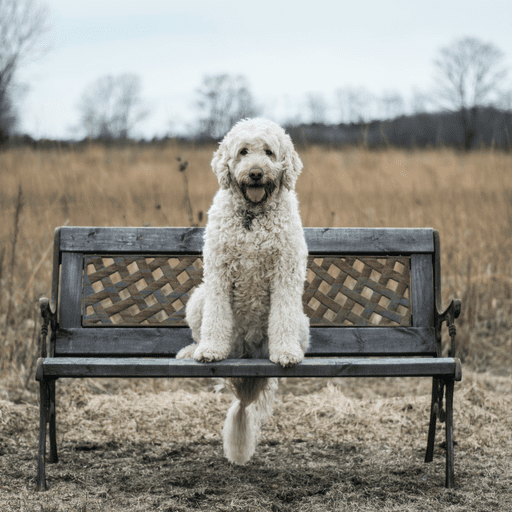

In [7]:
# Give the path of your image
IMAGE_PATH = '/content/inpaint-example.png'
# Read the image from the path
image = cv2.imread(IMAGE_PATH)
cv2_imshow(image)
# Convert to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

load model SAM.

`SamPredictor` untuk melakukan segmentation image, sehingga kita bisa mendptkan koordinat dari objek

lokasi objek ada di (250,250)

In [8]:
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

# Provide points as input prompt [X, Y]-coordinates
input_point = np.array([[250, 250]])
input_label = np.array([1])

# Predicting Segmentation mask
masks, scores, logits = mask_predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


mask nya adlh boolean dlm array (gambar binary) kita convert jd nilai pixel, lalu ubah shape dr (1,512,512) jd (512,512,1) dan convert jd hitam putih

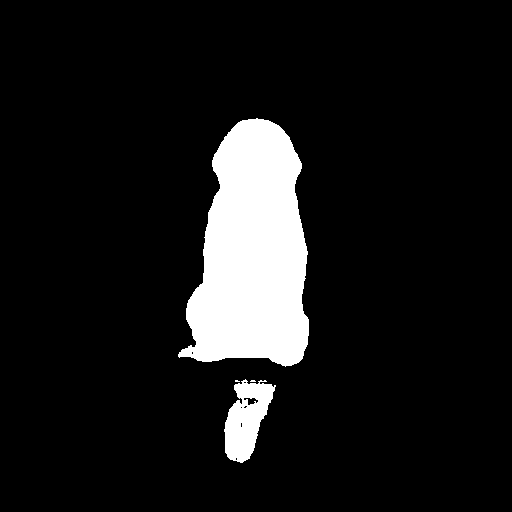

In [9]:
mask = masks.astype(float) * 255
mask = np.transpose(mask, (1, 2, 0))
_ , bw_image = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY)
cv2_imshow(bw_image)
cv2.imwrite('mask.png', bw_image)
del sam, mask_predictor   # delete models to conserve GPU memory

SAM tlh melakukan tugas membuat mask.

next gunakan stable diffusion untuk inpainting

buat pipeline stable diffusion

In [10]:
# Load images using PIL
init_image = Image.open(IMAGE_PATH)
mask_image = Image.open('mask.png')
# mask_image = Image.open('mask.png').convert('RGB') # Convert mask to RGB

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16
)
pipe = pipe.to(DEVICE)

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


beri prompt

In [12]:
prompt = "a grey cat sitting on a bench, high resolution"
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
image.save('output.png')

RuntimeError: Given groups=1, weight of size [128, 3, 3, 3], expected input[1, 1, 512, 512] to have 3 channels, but got 1 channels instead

In [ ]:
image = cv2.imread('/content/output.png')
cv2_imshow(image)

## outpainting

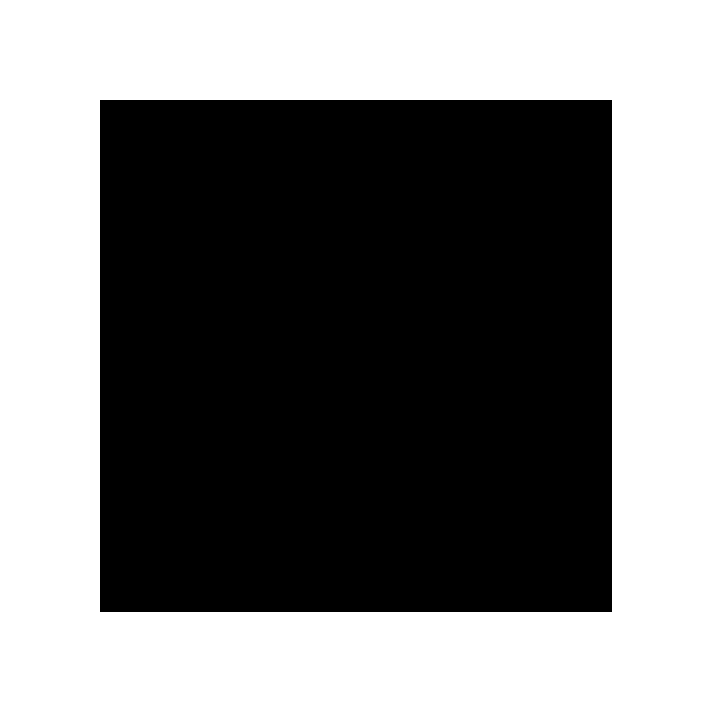

True

In [13]:
# Give the path of your image
IMAGE_PATH = '/content/inpaint-example.png'
# Read the image from the path
image = cv2.imread(IMAGE_PATH)
height, width = image.shape[:2]
padding = 100 # num pixels to outpaint
mask = np.ones((height+2*padding, width+2*padding), dtype=np.uint8) * 255
mask[padding:-padding, padding:-padding] = 0
cv2_imshow(mask)
cv2.imwrite("mask.png", mask)

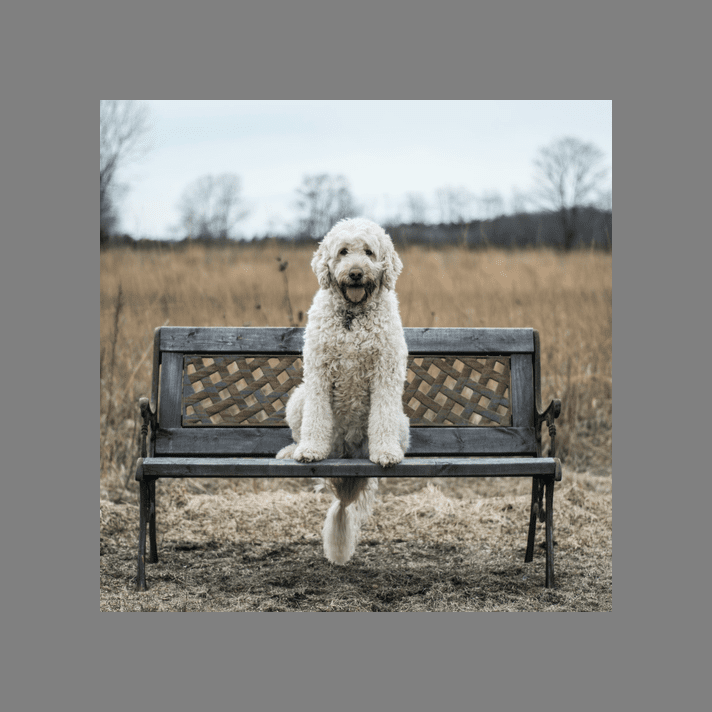

True

In [14]:
# extend the original image
image_extended = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=128)
cv2_imshow(image_extended)
cv2.imwrite("image_extended.png", image_extended)

In [15]:
image = cv2.imread('/content/output.png')
cv2_imshow(image)

AttributeError: 'NoneType' object has no attribute 'clip'